# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os
from os import listdir
from os.path import isfile, join
import time

import numpy as np
import pandas as pd
from IPython.core.display import display, HTML

from collections import Counter
from scipy.misc import imresize
from scipy.misc import imrotate
import pickle

from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
np.random.seed(121)

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Image data shape = (32, 32)
Number of classes = 43


In [4]:
df = pd.DataFrame({"Dataset":['Train','Validation','Test'],
                   "Number of samples":[n_train,n_validation,n_test]},
                  index=range(1,4),
                  columns=["Dataset","Number of samples"]
                 )
display(HTML(df.to_html(index=False)))

Dataset,Number of samples
Train,34799
Validation,4410
Test,12630


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

<font color='blue'>Display one of the images in each class label of the training set.</font>

In [5]:
def NewFigure(sizeCol=12, sizeRow=6):
    return plt.figure(figsize=(sizeCol, sizeRow))

def DisplaySub(countRow,countCol,index,image,title='',cmap=None):
    fig.add_subplot(countRow, countCol, index)
    plt.title(title)
    plt.axis("off")
    plt.imshow(image,cmap=cmap) 

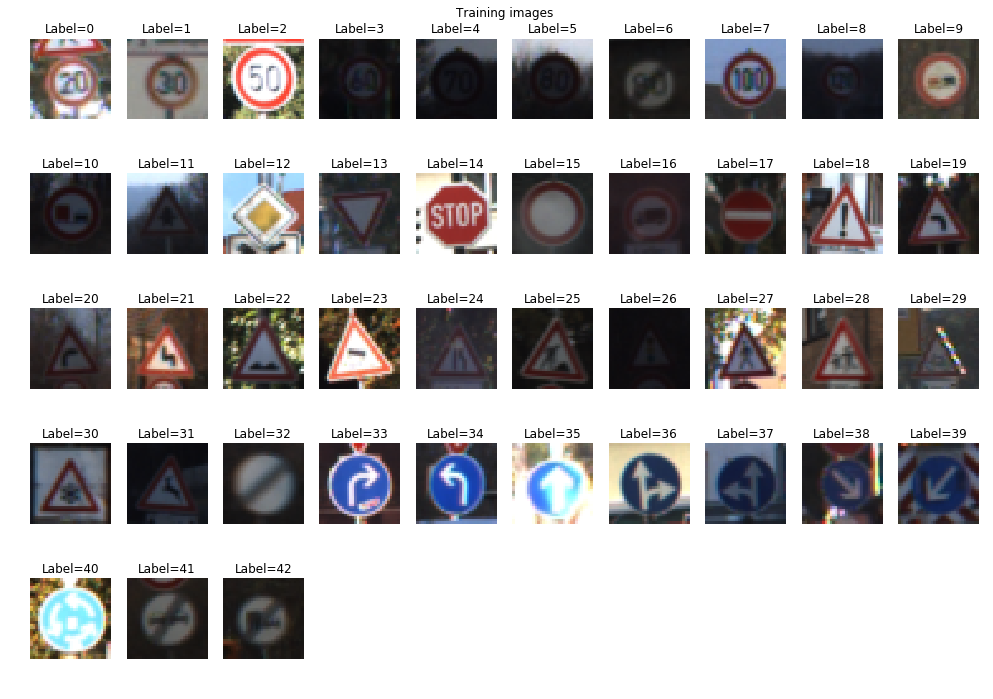

In [6]:
dispRow=5
dispCol=10
fig=NewFigure(17,12)
plt.title('Training images')
plt.axis("off")
for i in range(n_classes):
    indices=np.argwhere(y_train==i)
    indices=indices.reshape(indices.shape[0])
    randIdx = np.random.choice(indices)
    img=X_train[randIdx,:,:,:]
    DisplaySub(dispRow,dispCol,i+1,img,'Label='+str(i))
plt.show()

<font color='blue'>Visualize in sample size of each class label.</font>

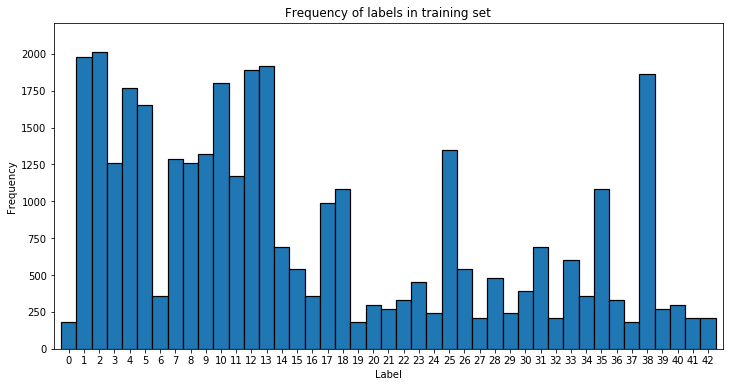

In [7]:
def extract_frequency(data, length):
    t=Counter(data)
    keys = range(length)
    counts = [v for k,v in t.items()]
    counts=np.zeros([length])
    for k,v in t.items():
        counts[k]=v
    return keys, counts

def plot_label_freq(data,title):
    keys, counts = extract_frequency(data,n_classes)
    labels=[str(i) for i in keys]
    tickLocations = np.arange(len(labels))
    max_freq = np.max(counts)

    fig, ax = plt.subplots(figsize=(12, 6))
    n, bins, patches = plt.hist(data, bins=range(len(counts)+1), align='left',edgecolor='black', linewidth=1.2)
    ax.set_xticks(ticks= tickLocations)
    ax.set_xticklabels(labels)
    plt.axis([-1,len(counts),0,max_freq*1.10])
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel("Label")
    plt.show()
    return counts

counts_train=plot_label_freq(y_train,'Frequency of labels in training set')

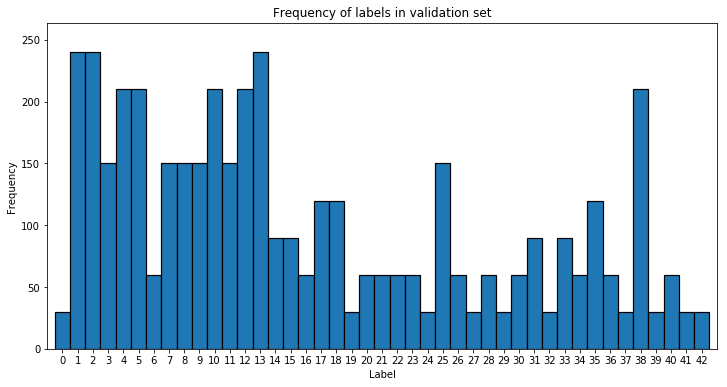

In [8]:
counts_valid=plot_label_freq(y_valid,'Frequency of labels in validation set')

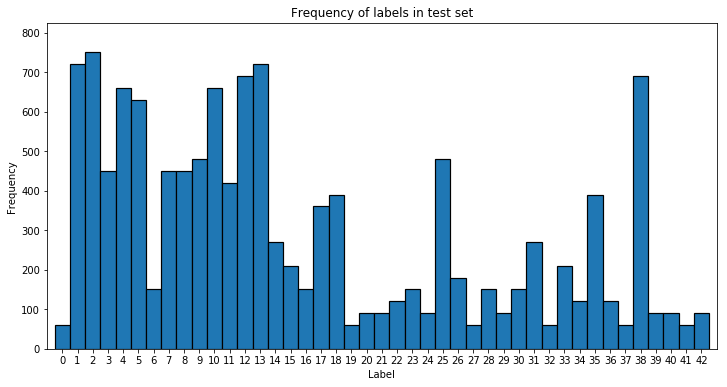

In [9]:
counts_test=plot_label_freq(y_test,'Frequency of labels in test set')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

<font color='blue'>From the visualization of the sample size of each class label, we observed there is a huge imbalance in sample size among the classes.</font>

<font color='blue'>First, we determine the lack of samples for each label class relative to the class with the highest number of samples.</font>

In [10]:
replicateFactorTrain = np.round((np.max(counts_train)*np.ones_like(counts_train))/counts_train,2)-1
replicateCountTrain = np.round(replicateFactorTrain*counts_train)
replicateCountTrain = replicateCountTrain.astype(np.int32)

In [11]:
df = pd.DataFrame({"Label":range(n_classes),
                   "Number of samples":counts_train.astype(np.int32),
                   "Factor to replicate":replicateFactorTrain,
                   "Count to replicate":replicateCountTrain,
                   "Final count":(counts_train+replicateCountTrain).astype(np.int32)
                  },
                  index=range(n_classes),
                  columns=["Label","Number of samples","Factor to replicate","Count to replicate","Final count"]
                 )
display(HTML(df.to_html(index=False)))

Label,Number of samples,Factor to replicate,Count to replicate,Final count
0,180,10.17,1831,2011
1,1980,0.02,40,2020
2,2010,0.00,0,2010
3,1260,0.60,756,2016
4,1770,0.14,248,2018
5,1650,0.22,363,2013
6,360,4.58,1649,2009
7,1290,0.56,722,2012
8,1260,0.60,756,2016
9,1320,0.52,686,2006


<font color='blue'>Then we will define the data preprocessing pipeline.</font>

<font color='blue'>1. Convert color images into grayscale images.</font>

In [12]:
def rgb2gray(rgb):
    """
    Convert rgb image to gray image.
    Args:
        img:  (numpy array) color image.
    Returns:
        (numpy array) gray image.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

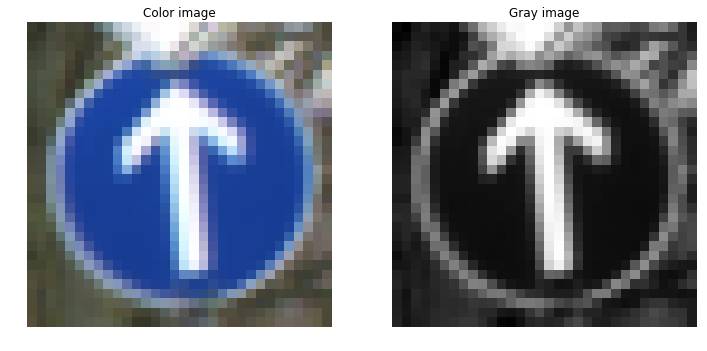

In [13]:
idx=20007
img=X_train[idx,:,:,:]
imgGray=rgb2gray(img)

fig=NewFigure()
DisplaySub(1,2,1,img,'Color image',None)
DisplaySub(1,2,2,imgGray,'Gray image','gray')

<font color='blue'>2. Introduce slight translations in the images. The images are offset by two pixels relative to the image center in one of the eight directions, i.e. NW, N, NE, E, SE, S, SW, and W.</font>

In [14]:
def scale_image_max(img):
    """
    Scale image to the range of [0,255].
    Args:
        img:  (numpy array) image.
    Returns:
        (numpy array) scaled image.
    """
    gmin=np.min(img)
    gmax=np.max(img)
    mult=255./(gmax-gmin)
    add=-mult*gmin
    return img*mult + add

def translate_image_radius_2(img,direction):
    """
    Offset image by two pixels relative to the image center in
    one of the eight directions (NW, N, NE, E, SE, S, SW, and W).
    Args:
        img:         (numpy array) image.
        direction:   (int) 0 - NW
                           1 - N
                           2 - NE
                           3 - E
                           4 - SE
                           5 - S
                           6 - SW
                           7 - W
    Returns:
        (numpy array) translated image.
    """
    h=img.shape[0]
    w=img.shape[1]
    shapeNew=(h+4,w+4)
    imgScaled=scale_image_max(img)
    b=imresize(imgScaled,shapeNew,interp='bilinear')

    startYs=[0,0,0,2,4,4,4,2]
    startXs=[0,2,4,4,4,2,0,0]
    startY=startYs[direction]
    startX=startXs[direction]   
    b[startY:startY+h,startX:startX+w]=imgScaled

    startY=2
    startX=2
    cropped=b[startY:startY+h,startX:startX+w]
    return cropped

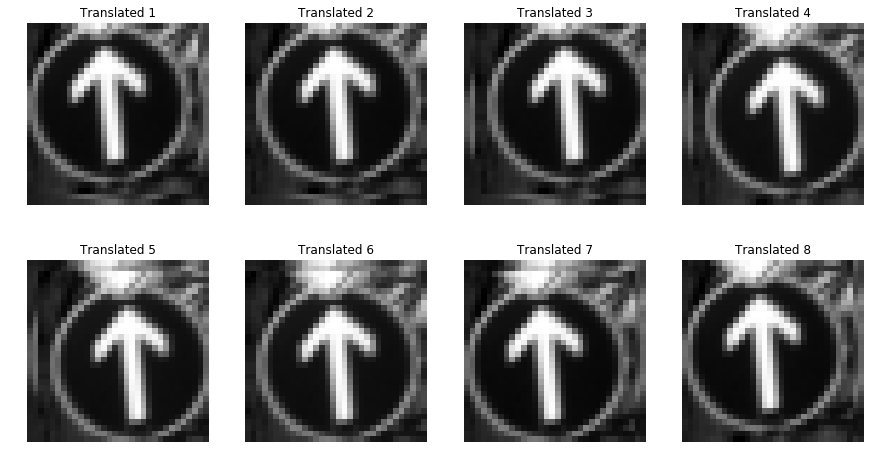

In [15]:
dispRow=2
dispCol=4
fig=NewFigure(15,8);
for i in range(8):
    cropped=translate_image_radius_2(imgGray,i)
    DisplaySub(dispRow,dispCol,i+1,cropped,'Translated '+str(i+1),'gray')
plt.show()

<font color='blue'>3. Introduce slight rotations in the images. Typical rotations to be introduced here are +8 degree or -8 degree.</font>

In [16]:
def rotate_image(img,angle):
    """
    Rotate image in counter clockwise direction.
    Args:
        img:   (numpy array) image.
        angle: (float) angle in degree.
    Returns:
        (numpy array) rotated image.
    """
    h=img.shape[0]
    w=img.shape[1]
    shapeNew=(h+4,w+4)
    imgScaled=scale_image_max(img)
    b=imresize(imgScaled,shapeNew,interp='bilinear')

    startY=2
    startX=2   
    b[startY:startY+h,startX:startX+w]=imgScaled

    rotated=imrotate(b,angle,interp='bilinear')
    cropped=rotated[startY:startY+h,startX:startX+w]
    return cropped

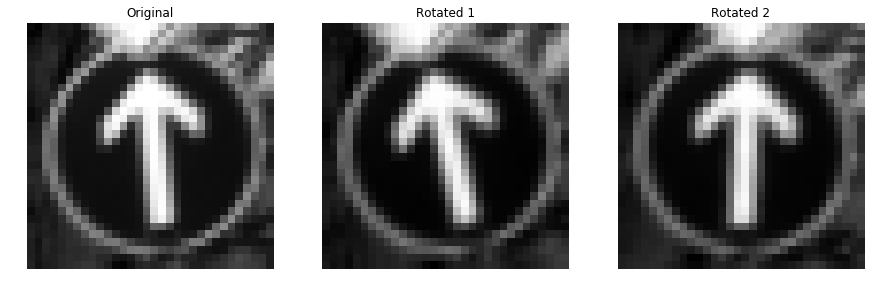

In [17]:
angle=8
angles=[angle,360-angle]

dispRow=1
dispCol=3
fig=NewFigure(15,8);
DisplaySub(dispRow,dispCol,1,imgGray,'Original','gray')
for i in range(len(angles)):
    rotated=rotate_image(imgGray,angles[i])
    DisplaySub(dispRow,dispCol,i+2,rotated,'Rotated '+str(i+1),'gray')
plt.show()

<font color='blue'>4. Normalize the image to have mean 0 and standard deviation 1.</font>

In [18]:
print("Mean: %s \nStd dev: %s"%(np.mean(rotated),np.std(rotated)))

Mean: 69.884765625 
Std dev: 63.5147805321


In [19]:
def normalizeImage(image):
    """
    Normalize the image to have mean 0 and standard deviation 1..
    Args:
        img:   (numpy array) image.
    Returns:
        (numpy array) normalized image.
    """
    return (image - np.mean(image))/np.std(image)

In [20]:
imgNorm=normalizeImage(rotated)
print("Mean: %s \nStd dev: %s"%(np.mean(imgNorm),np.std(imgNorm)))

Mean: -2.77555756156e-17 
Std dev: 1.0


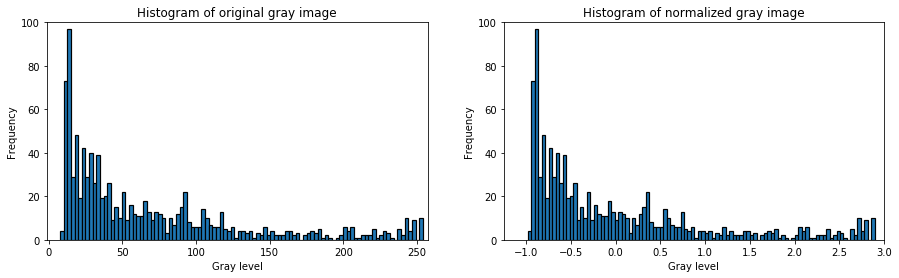

In [21]:
def plot_histo_image(img,axis,title):
    image_1d=img.reshape(-1)
    n, bins, patches = plt.hist(image_1d, bins=100, align='left', edgecolor='black', linewidth=1.2)
    plt.axis(axis)
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel("Gray level")

dispRow=1
dispCol=2
fig=NewFigure(15,4);
fig.add_subplot(dispRow, dispCol, 1)
plot_histo_image(rotated,[-1,257,0,100],"Histogram of original gray image")
fig.add_subplot(dispRow, dispCol, 2)
plot_histo_image(imgNorm,[-1.25,3,0,100],"Histogram of normalized gray image")
plt.show()

<font color='blue'>With the preprocessing pipeline defined, we will first preprocessing the original training data without any translation or rotation.</font>

In [22]:
def maybe_preprocess(data, filename, force=False):
    if os.path.exists(filename + '.p') and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping preprocessing. Loading pickle file instead.' % (filename + '.p'))
        try:
            print('Loading %s ...' % (filename + '.p'))
            with open(filename + '.p', 'rb') as f:
                dataPreprocessed = pickle.load(f)
            print('Loading done.')
        except Exception as e:
            print('Unable to extract data from', filename, ':', e)
    
    else:
        print('Preprocessing images ...' )
        
        count,imageHeight,imageWidth,imageChannel = data['features'].shape
        sizeLength = data['sizes'].shape[1]
        coordLength = data['coords'].shape[1]
        
        dataPreprocessed = {}
        features=np.zeros((1,imageHeight,imageWidth,1),dtype = np.float32)
        labels=np.zeros((1,),dtype = np.int32)
        sizes=np.zeros((1,sizeLength),dtype = np.int32)
        coords=np.zeros((1,coordLength),dtype = np.int32)
        
        for i in range(count):
            img = data['features'][i,:,:,:]
            gray = rgb2gray(img)
            f = normalizeImage(gray)
            f = f.reshape((1,imageHeight,imageWidth,1))
            features = np.concatenate((features,f),axis=0)
            l = np.reshape(data['labels'][i,],(1,))
            labels = np.concatenate((labels,l),axis=0)
            s = np.reshape(data['sizes'][i,:],(1,sizeLength))
            sizes = np.concatenate((sizes,s),axis=0)
            c = np.reshape(data['coords'][i,:],(1,coordLength))
            coords = np.concatenate((coords,c),axis=0)
            
            if (i % 2000 == 0):
                print('%s / %s elapsed.'% (i,count))
                print('%s items concatenated.'% (features.shape[0]-1))
        
        dataPreprocessed['features']=features[1:,:,:,:]
        dataPreprocessed['labels']=labels[1:,]
        dataPreprocessed['sizes']=sizes[1:,:]
        dataPreprocessed['coords']=coords[1:,:]
        
        print('Preprocessing done.')
        print('Pickling %s ...' % (filename + '.p'))
        try:
            with open(filename + '.p', 'wb') as f:
                pickle.dump(dataPreprocessed, f, pickle.HIGHEST_PROTOCOL)
            print('Pickling done.')
        except Exception as e:
            print('Unable to save data to',  filename + '.p', ':', e)
     
    return dataPreprocessed

In [23]:
trainPreprocessed = maybe_preprocess(train,'traffic-signs-data/trainPreprocessed')

traffic-signs-data/trainPreprocessed.p already present - Skipping preprocessing. Loading pickle file instead.
Loading traffic-signs-data/trainPreprocessed.p ...
Loading done.


In [24]:
validPreprocessed = maybe_preprocess(valid,'traffic-signs-data/validPreprocessed')

traffic-signs-data/validPreprocessed.p already present - Skipping preprocessing. Loading pickle file instead.
Loading traffic-signs-data/validPreprocessed.p ...
Loading done.


In [25]:
testPreprocessed = maybe_preprocess(test,'traffic-signs-data/testPreprocessed')

traffic-signs-data/testPreprocessed.p already present - Skipping preprocessing. Loading pickle file instead.
Loading traffic-signs-data/testPreprocessed.p ...
Loading done.


<font color='blue'>Next, we will generate additional variations of the existing training samples to ensure the class labels are balanced.<br>
<br>
We will be using 8 possible translations (NW, N, NE, E, SE, S, SW, and W) and 2 possible rotations (+8 degree and -8 degree), hence each image can have up to 8x2=16 variations.<br>
<br>
For each class label, we will sample randomly from existing images and apply the transformations with also random configurations (i.e. translation direction and rotation angles). We will continue the sampling until the 'replicateCount' for each class label is reached.</font>

In [26]:
def maybe_generate(data, replicateCount, filename, force=False):
    if os.path.exists(filename + '.p') and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping generating. Loading pickle file instead.' % (filename + '.p'))
        try:
            print('Loading %s ...' % (filename + '.p'))
            with open(filename + '.p', 'rb') as f:
                dataGenerated = pickle.load(f)
            print('Loading done.')
        except Exception as e:
            print('Unable to extract data from', filename, ':', e)
    
    else:
        print('Generating new data ...' )
        
        count,imageHeight,imageWidth,imageChannel = data['features'].shape
        sizeLength = data['sizes'].shape[1]
        coordLength = data['coords'].shape[1]
        n_classes = len(np.unique(data['labels']))
        
        dataGenerated = {}
        features=np.zeros((1,imageHeight,imageWidth,1),dtype = np.float32)
        labels=np.zeros((1,),dtype = np.int32)
        sizes=np.zeros((1,sizeLength),dtype = np.int32)
        coords=np.zeros((1,coordLength),dtype = np.int32)
        
        transDirections=range(8)
        angle=8
        angles=[angle,360-angle]
        
        for i in range(n_classes):
            indices=np.argwhere(data['labels']==i)
            indices=indices.reshape((indices.shape[0]))
            for j in range(replicateCount[i]):
                idx = np.random.choice(indices)
                img = data['features'][idx,:,:,:]
                gray = rgb2gray(img)
                
                t = np.random.choice(transDirections)
                r = np.random.choice(angles)
                trans = translate_image_radius_2(gray,t)
                rot = rotate_image(trans,r)
                f = normalizeImage(rot)
                
                f = f.reshape((1,imageHeight,imageWidth,1))
                features = np.concatenate((features,f),axis=0)
                l = np.reshape(data['labels'][idx,],(1,))
                labels = np.concatenate((labels,l),axis=0)
                s = np.reshape(data['sizes'][idx,:],(1,sizeLength))
                sizes = np.concatenate((sizes,s),axis=0)
                c = np.reshape(data['coords'][idx,:],(1,coordLength))
                coords = np.concatenate((coords,c),axis=0)

            print('Data for label %s generated.'% (i))
            print('%s items concatenated.'% (replicateCount[i]))
            
        dataGenerated['features']=features[1:,:,:,:]
        dataGenerated['labels']=labels[1:,]
        dataGenerated['sizes']=sizes[1:,:]
        dataGenerated['coords']=coords[1:,:]
        
        print('Generating done.')
        print('Pickling %s ...' % (filename + '.p'))
        try:
            with open(filename + '.p', 'wb') as f:
                pickle.dump(dataGenerated, f, pickle.HIGHEST_PROTOCOL)
            print('Pickling done.')
        except Exception as e:
            print('Unable to save data to',  filename + '.p', ':', e)
        
    return dataGenerated

In [27]:
trainGenerated = maybe_generate(train,replicateCountTrain,'traffic-signs-data/trainGenerated')

traffic-signs-data/trainGenerated.p already present - Skipping generating. Loading pickle file instead.
Loading traffic-signs-data/trainGenerated.p ...
Loading done.


<font color='blue'>Display one of the images in each class label of the generated training set.</font>

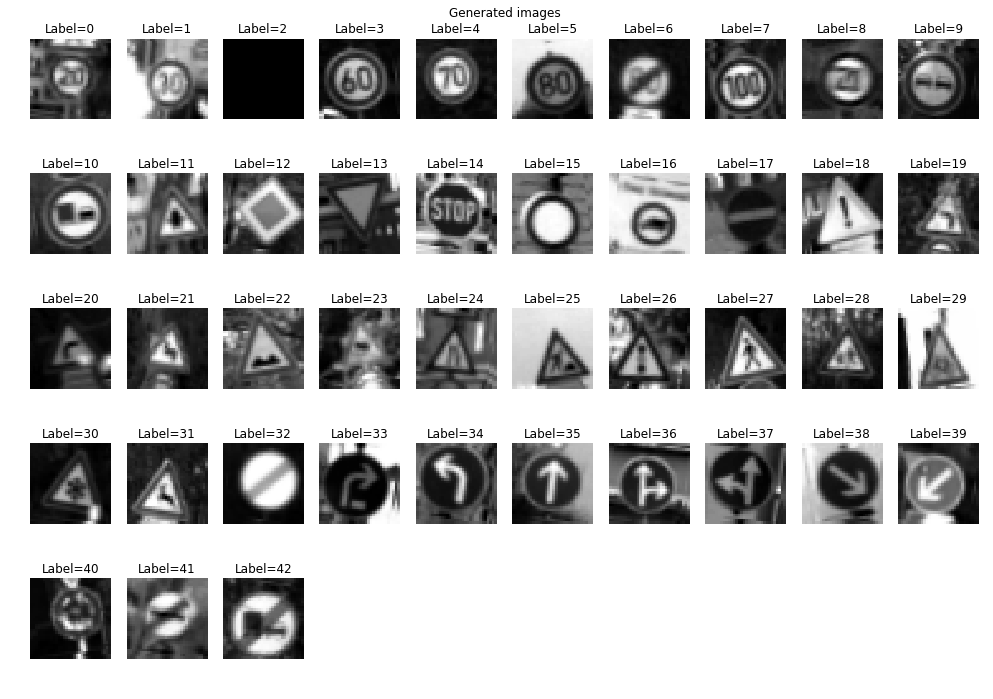

In [28]:
dispRow=5
dispCol=10
fig=NewFigure(17,12)
plt.title('Generated images')
plt.axis("off")
for i in range(n_classes):
    indices=np.argwhere(trainGenerated['labels']==i)
    indices=indices.reshape(indices.shape[0])
    if (len(indices)==0):
        img=np.zeros(image_shape)
    else:
        randIdx = np.random.choice(indices)
        img=trainGenerated['features'][randIdx,:,:,0]
    DisplaySub(dispRow,dispCol,i+1,img,'Label='+str(i),'gray')
plt.show()

<font color='blue'>Concatenate the original training set and the generated training set.</font>

In [29]:
X_trainConcat = np.concatenate((trainPreprocessed['features'],trainGenerated['features']),axis=0)
y_trainConcat = np.concatenate((trainPreprocessed['labels'],trainGenerated['labels']),axis=0)

print("X_trainConcat shape: %s,%s,%s,%s"%(X_trainConcat.shape))
print("y_trainConcat shape: %s"%(y_trainConcat.shape))

X_trainConcat shape: 86466,32,32,1
y_trainConcat shape: 86466


<font color='blue'>Visualize in sample size of each class label in the augmented training set.</font>

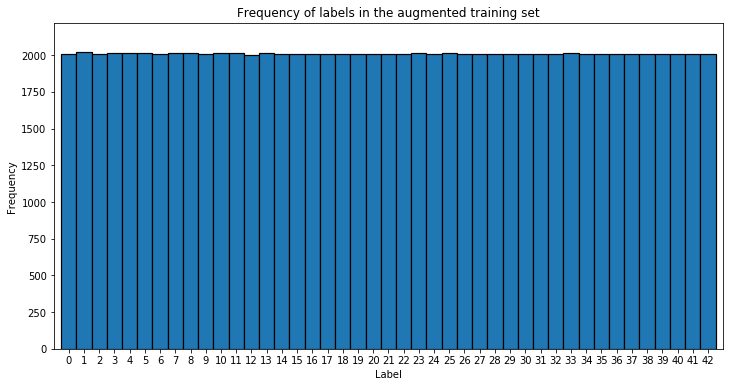

In [30]:
countsNew=plot_label_freq(y_trainConcat,'Frequency of labels in the augmented training set')

In [31]:
X_trainNew, y_trainNew = shuffle(X_trainConcat, y_trainConcat)
X_validNew, y_validNew = validPreprocessed['features'], validPreprocessed['labels']
X_testNew, y_testNew = testPreprocessed['features'], testPreprocessed['labels']

In [32]:
df = pd.DataFrame({"Dataset":['Augmented Train','Validation','Test'],
                   "Number of samples":[X_trainNew.shape[0],X_validNew.shape[0],X_testNew.shape[0]]},
                  index=range(1,4),
                  columns=["Dataset","Number of samples"]
                 )
display(HTML(df.to_html(index=False)))

Dataset,Number of samples
Augmented Train,86466
Validation,4410
Test,12630


### Model Architecture

In [33]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

EPOCHS = 40
BATCH_SIZE = 128
HYPERPARAM_ITER_MAX = 30

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

beta = 1

In [34]:
def batch_norm_relu(x, is_training, iteration, beta, conv=False):
    """ Batch normalization for ReLu 
    
        Normalize the input, x based on its batch mean and variance plus some offset, beta during training.
        During prediction, moving average of the mean and variance will be used instead of batch mean and variance.
    
    Args:
        x:              (tf.variables) input.   
        is_training:    (tf.bool) boolean flag to indicate whether it is in training mode.
        beta:           (tf.float) trainable offset parameter to the normalized result.
        conv:           (tf.bool) boolean flag to indicate whether the input is convolutional layer or fully connected 
                        layer.
    Returns:
        (tf.variables) Ybn - the batch normalized output.
        update_moving_averages - A Tensorflow operation that updates the moving averages.
    
    Credit: Martin Gorner 
            (https://github.com/martin-gorner/tensorflow-mnist-tutorial/blob/master/mnist_4.2_batchnorm_convolutional.py)
    Reference: Ioffe, Szegedy (2015) - Batch Normalization: Accelerating Deep Network Training by Reducing Internal 
               Covariate Shift (https://arxiv.org/abs/1502.03167)
    """
    # adding the iteration prevents from averaging across non-existing iterations
    if (iteration==-1):
        iteration=None
    exp_moving_avg = tf.train.ExponentialMovingAverage(0.9999, iteration)
    bnepsilon = 1e-5
    
    # calculate mean and variance for batch of logits
    if conv:
        mean, variance = tf.nn.moments(x, [0, 1, 2])
    else:
        # mean and variance along the batch
        mean, variance = tf.nn.moments(x, [0])
    
    update_moving_averages = exp_moving_avg.apply([mean, variance])
    
    # Mean and Variance (how it get it is dependent on whether it is training)
    m = tf.cond(is_training,
                lambda: mean,
                lambda: exp_moving_avg.average(mean))
    v = tf.cond(is_training,
                lambda: variance,
                lambda: exp_moving_avg.average(variance))
    
    # Apply Batch Norm
    Ybn = tf.nn.batch_normalization(x, m, v, offset=beta, scale=None,
                                    variance_epsilon=bnepsilon)
    return Ybn, update_moving_averages

def conv_layer_odd(x, patch_size, channels_in, channels_out, \
                   keep_prob, iteration, is_training, name="conv_layer_odd"):
    with tf.variable_scope(name):
        W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, channels_in, channels_out), \
                                                  mean = mu, stddev = sigma), name="W")
        beta = tf.Variable(tf.constant(1.0, tf.float32, [channels_out]),name="beta")
        conv   = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID')

        # Activation.
        act = tf.nn.relu(conv)

        # Batch normalization.
        batch_norm, update_ema = batch_norm_relu(act, is_training, iteration, beta, conv=True)

        # Dropout. 
        drop = tf.nn.dropout(batch_norm, keep_prob)
        return drop, update_ema

def conv_layer_even(x, patch_size, channels_in, channels_out, \
                    keep_prob, iteration, is_training, name="conv_layer_even"):
    with tf.variable_scope(name):
        W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, channels_in, channels_out), \
                                                  mean = mu, stddev = sigma), name="W")
        beta = tf.Variable(tf.constant(1.0, tf.float32, [channels_out]),name="beta")
        conv   = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID')

        # Activation.
        act = tf.nn.relu(conv)

        # Batch normalization.
        batch_norm, update_ema = batch_norm_relu(act, is_training, iteration, beta, conv=True)

        # Pooling. Input = 28x28xLayer2Depth. Output = 14x14xLayer2Depth.
        pool = tf.nn.max_pool(batch_norm, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # Dropout.
        drop = tf.nn.dropout(pool, keep_prob)
        return drop, update_ema
    
def fc_layer(x, channels_in, channels_out, keep_prob, iteration, is_training, name="fc_layer"):
    with tf.variable_scope(name):
        W = tf.Variable(tf.truncated_normal(shape=(channels_in, channels_out), mean = mu, stddev = sigma),\
                            name="W")
        beta = tf.Variable(tf.constant(1.0, tf.float32, [channels_out]),name="beta")
        fc   = tf.matmul(x, W)

        # Activation.
        act    = tf.nn.relu(fc)

        # Batch normalization.
        batch_norm, update_ema = batch_norm_relu(act, is_training, iteration, beta, conv=False)
        shape = batch_norm.get_shape().as_list()
        batch_norm = tf.reshape(batch_norm, [-1, shape[1], 1, 1])

        # Dropout.
        drop = tf.nn.dropout(batch_norm, keep_prob)        
        drop = tf.reshape(drop, [-1, shape[1]])
        return drop, update_ema

In [35]:
def LeNet(): 
    graph=tf.Graph()
    with graph.as_default():
        
        Layer1Depth=32
        Layer2Depth=32
        Layer3Depth=64
        Layer4Depth=64
        FC6Depth=1000
        FC7Depth=1000

        x = tf.placeholder(tf.float32, (None, 32, 32, 1))
        y = tf.placeholder(tf.int32, (None))
        one_hot_y = tf.one_hot(y, 43)

        iteration = tf.placeholder(tf.int32)
        training_flag = tf.placeholder(tf.bool)
        learning_rate = tf.placeholder(tf.float32)
        keep_prob_conv = tf.placeholder(tf.float32)
        keep_prob_fc = tf.placeholder(tf.float32)

        # Layer 1: Convolutional. Input = 32x32x1. Output = 30x30xLayer1Depth.
        conv1, update_ema1 = conv_layer_odd(x,3,1,Layer1Depth,\
                                            keep_prob_conv, iteration, training_flag, "conv1")

        # Layer 2: Convolutional. Input = 30x30xLayer1Depth. Output = 14x14xLayer2Depth.
        conv2, update_ema2 = conv_layer_even(conv1,3,Layer1Depth,Layer2Depth,\
                                             keep_prob_conv, iteration, training_flag, "conv2")

        # Layer 3: Convolutional. Input = 14x14xLayer2Depth. Output = 12x12xLayer3Depth.
        conv3, update_ema3 = conv_layer_odd(conv2,3,Layer2Depth,Layer3Depth,\
                                            keep_prob_conv, iteration, training_flag, "conv3")

        # Layer 4: Convolutional. Input = 12x12xLayer3Depth. Output = 5x5xLayer4Depth.
        conv4, update_ema4 = conv_layer_even(conv3,3,Layer3Depth,Layer4Depth,\
                                             keep_prob_conv, iteration, training_flag, "conv4")

        # Flatten. Input = 5x5xLayer4Depth. Output = [5x5xLayer4Depth].
        with tf.variable_scope("flatten5"):
            flatten5   = flatten(conv4)
            shape5 = flatten5.get_shape().as_list()

        # Layer 6: Fully Connected with batch_norm & dropout. Input = [5*5*Layer4Depth]. Output = FC6Depth.
        fc6, update_ema6 = fc_layer(flatten5, shape5[1], FC6Depth, keep_prob_fc, \
                                    iteration, training_flag, "fc6")

        # Layer 7: Fully Connected with batch_norm & dropout. Input = FC6Depth. Output = FC7Depth.
        fc7, update_ema7 = fc_layer(fc6, FC6Depth, FC7Depth, keep_prob_fc, \
                                    iteration, training_flag, "fc7")

        # Layer 8: Fully Connected. Input = FC7Depth. Output = 43.
        with tf.variable_scope("fc8"):
            fc8_W  = tf.Variable(tf.truncated_normal(shape=(FC7Depth, 43), mean = mu, stddev = sigma), name="W")
            fc8_b  = tf.Variable(tf.zeros(43),name="b")
            logits = tf.matmul(fc7, fc8_W) + fc8_b

        update_ema = tf.group(update_ema1, update_ema2, update_ema3, update_ema4, \
                              update_ema6, update_ema7)
        
        with tf.variable_scope("loss"):
            cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
            loss = tf.reduce_mean(cross_entropy)
            
        with tf.variable_scope("trainer"):
            optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
            training_operation = optimizer.minimize(loss)

        with tf.variable_scope("ouputs"):
            softmax_outputs = tf.nn.softmax(logits)
            predictions = tf.argmax(softmax_outputs, 1)
            
        with tf.variable_scope("accuracy"):
            correct_prediction = tf.equal(predictions, tf.argmax(one_hot_y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        saver = tf.train.Saver(max_to_keep=HYPERPARAM_ITER_MAX)
    
    return x, y, \
            learning_rate, keep_prob_conv, keep_prob_fc, training_flag, iteration, \
            update_ema, loss, training_operation, \
            softmax_outputs, predictions, accuracy, \
            conv1, conv2, conv3, conv4, \
            saver, graph

In [36]:
(x, y, \
 learning_rate,\
 keep_prob_conv, keep_prob_fc, \
 training_flag, \
 iteration, \
 update_ema, \
 loss, \
 training_operation, \
 softmax_outputs, \
 predictions, accuracy, \
 conv1, conv2, conv3, conv4, \
 saver, graph) = LeNet()

In [37]:
#writer=tf.summary.FileWriter("./tensorboard/1")
#writer.add_graph(graph)

<figure>
 <img src="./tensorboard/graph_run=.png" width="720" alt="Model graph" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Visualization of the network using Tensorboard.</p> 
 </figcaption>
</figure>
 <p></p> 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [38]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
def evaluate_loss(X_data, y_data, step):
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_loss = sess.run(loss, feed_dict={x: batch_x, y: batch_y,\
                                                   training_flag: True,\
                                                   keep_prob_conv : 1.0,\
                                                   keep_prob_fc : 1.0,\
                                                   iteration : step})
        total_loss += (batch_loss * len(batch_x))
    return total_loss / num_examples

def evaluate_accuracy(X_data, y_data, step, isTraining):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_accuracy = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y,\
                                                           training_flag: isTraining,\
                                                           keep_prob_conv : 1.0,\
                                                           keep_prob_fc : 1.0,\
                                                           iteration : step})
        total_accuracy += (batch_accuracy * len(batch_x))
    return total_accuracy / num_examples

def predict(X_data):
    num_examples = len(X_data)
    results = np.zeros(1)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_predictions = sess.run(predictions, feed_dict={x: batch_x,\
                                                           training_flag: False,\
                                                           keep_prob_conv : 1.0,\
                                                           keep_prob_fc : 1.0,\
                                                           iteration : -1})
        results = np.concatenate((results,batch_predictions),axis=0)
    return results[1:]

def evaluate_precision_recall(X_data, y_data, step, isTraining):
    # precision = TP / (TP + FP)
    # recall= TP / (TP + FN)
    preds = predict(X_data)
    
    Precision={}
    Recall={}
    
    Precision['list']=precision_score(y_data, preds, average=None)
    Precision['weighted']=precision_score(y_data, preds, average='weighted')
    Recall['list']=recall_score(y_data, preds, average=None)
    Recall['weighted']=recall_score(y_data, preds, average='weighted')
    return Precision, Recall

def evaluate_fscore(beta, precision, recall):
    return (1+beta**2)*(precision*recall)/ ((beta**2 * precision) + recall)

In [39]:
def train_model(X_train, y_train,\
                X_valid, y_valid,\
                rate,\
                keep_prob_conv_train,keep_prob_fc_train,\
                model_path,\
                log_path,\
                display_progress=True):
    import time

    logging_loss={}
    logging_train_acc={}
    logging_valid_acc={}
    
    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        if (display_progress):
            print("Training...")
            print()
            
        step=0
        valid_acc_best = 0.
        epoch_best = 0

        last_time = time.time()
        train_start_time = time.time()

        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,\
                                                        training_flag: True,\
                                                        learning_rate: rate,\
                                                        keep_prob_conv : keep_prob_conv_train,\
                                                        keep_prob_fc : keep_prob_fc_train,\
                                                        iteration : step})
                sess.run(update_ema, feed_dict={x: batch_x, y: batch_y,\
                                                        training_flag: True,\
                                                        keep_prob_conv : 1.0,\
                                                        keep_prob_fc : 1.0,\
                                                        iteration : step})
                step+=1

            # Define how many batch to be used for evaluation of training loss and accuracy.
            end=10*BATCH_SIZE
            batch_loss = evaluate_loss(X_train[0:end], y_train[0:end], step)
            batch_accuracy = evaluate_accuracy(X_train[0:end], y_train[0:end], step, True)
            validation_accuracy = evaluate_accuracy(X_valid, y_valid, step, False)

            logging_loss[i]=batch_loss
            logging_train_acc[i]=batch_accuracy
            logging_valid_acc[i]=validation_accuracy

            if(validation_accuracy > valid_acc_best):
                valid_acc_best = validation_accuracy
                epoch_best = i+1
                saver.save(sess, model_path)            

            if (display_progress):
                if ((i+1)%10==0 or i==0 or (i+1)==EPOCHS):
                    print("EPOCH %s ..."%(i+1))
                    print("Training Accuracy = %.4f"%(batch_accuracy))
                    print("Validation Accuracy = %.4f"%(validation_accuracy))
                    timeElapsed=time.time()-last_time
                    print("Elapsed time = %d min %.1f sec"%(np.floor(timeElapsed/60),timeElapsed%60))
                    print()
                    last_time = time.time()

        log = {}
        log['loss'] = logging_loss
        log['train_acc'] = logging_train_acc
        log['valid_acc'] = logging_valid_acc
        try:
            with open(log_path , 'wb') as f:
                pickle.dump(log, f, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print('Unable to save data to',  log_path, ':', e)

        total_time = time.time() - train_start_time
        print("Total training time = %d min %.1f sec"%(np.floor(total_time/60),total_time%60))
        print("Best model saved at:")
        print("Epoch %d\tValidation accuracy: %.4f"%(epoch_best,valid_acc_best))
        print()
    return valid_acc_best, total_time

In [40]:
def choose_params(results):
    while True:
        lr = np.random.uniform(low=LR[0],high=LR[1])
        keep_prob_conv = np.random.uniform(low=KEEP_PROB_CONV[0],high=KEEP_PROB_CONV[1])
        keep_prob_fc = np.random.uniform(low=KEEP_PROB_FC[0],high=KEEP_PROB_FC[1])
        params = (np.round(lr,6), np.round(keep_prob_conv,2), np.round(keep_prob_fc,2))
        
        if params not in results:
            break
    return params

In [41]:
LR=[5e-4,5e-3]
KEEP_PROB_CONV=[0.70,0.90]
KEEP_PROB_FC=[0.30,0.50]

df=pd.DataFrame({'Hyperparameter':['Learning rate', 'Dropout Keep Prob (Conv)', 'Dropout Keep Prob (FC)'],
                 'Lower limit':[LR[0],KEEP_PROB_CONV[0],KEEP_PROB_FC[0]],
                 'Upper limit':[LR[1],KEEP_PROB_CONV[1],KEEP_PROB_FC[1]]},
                index=range(1,4),
                columns=['Hyperparameter','Lower limit','Upper limit'])
display(HTML(df.to_html(index=False)))

Hyperparameter,Lower limit,Upper limit
Learning rate,0.0005,0.005
Dropout Keep Prob (Conv),0.7000,0.900
Dropout Keep Prob (FC),0.3000,0.500


In [42]:
hyperparam_iter=5

folder='./hyperparam-tuning/'

def maybe_tune_hyperparameters(iterations,folder,force=False):
    filename='hyperparam-tuning.p'
    if os.path.exists(folder+filename) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping hyperparameter tuning.' % (folder+filename))
        try:
            print('Loading %s ...' % (folder+filename))
            with open(folder+filename, 'rb') as f:
                data = pickle.load(f)
                indices_dict=data['indices']
                valid_acc_dict=data['valid_acc']
                total_time=data['total_time']
            print('Loading done.')
        except Exception as e:
            print('Unable to extract data from', folder+filename, ':', e)
    
    else:
        param_list=[]
        valid_acc_list=[]
        total_time=0
        for i in range(iterations):
            print("Training hyperparameter set %d ..."%(i+1))

            model_path=folder+'model'+str(i+1)+'.ckpt'
            log_path=folder+'model'+str(i+1)+'.p'

            params=choose_params(param_list)
            param_list.append(params)
            print("Learning rate: %.5f\tKeep prob conv: %.2f\tKeep prob fc: %.2f"%(params))

            lr,keep_prob_conv_train,keep_prob_fc_train=params
            valid_acc,elapsed_time=train_model(X_trainNew, y_trainNew,X_validNew, y_validNew,\
                                               lr,\
                                               keep_prob_conv_train,keep_prob_fc_train,\
                                               model_path,log_path,True)
            valid_acc_list.append(valid_acc)
            total_time+=elapsed_time
        indices_dict=dict(zip(param_list,range(1,iterations+1)))
        valid_acc_dict=dict(zip(param_list,valid_acc_list))
        data={}
        data['indices']=indices_dict
        data['valid_acc']=valid_acc_dict
        data['total_time']=total_time
        print('Hyperparameter tuning done.')
        print('Pickling %s ...' % (folder+filename))
        try:
            with open(folder+filename, 'wb') as f:
                pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
            print('Pickling done.')
        except Exception as e:
            print('Unable to save data to',  folder+filename, ':', e)
            
    hyperparams_list=[k for k in valid_acc_dict.keys()]
    valid_acc_list=[float(k) for k in valid_acc_dict.values()]
    i = np.argmax(valid_acc_list)
    model_index=indices_dict[hyperparams_list[i]]
    print('Best hyperparameter set:')
    print('\tSet %d '%(model_index))
    print('\tParameters = (%s,%s,%s)'%(hyperparams_list[i]))
    print('\tValidation accuracy = %.4f'%(valid_acc_dict[hyperparams_list[i]]))
    print("Total training time = %d min %.1f sec"%(np.floor(total_time/60),total_time%60))
    return model_index, hyperparams_list[i], data
    
model_index, best_params, tuning_result=maybe_tune_hyperparameters(hyperparam_iter,folder,force=False)

./hyperparam-tuning/hyperparam-tuning.p already present - Skipping hyperparameter tuning.
Loading ./hyperparam-tuning/hyperparam-tuning.p ...
Loading done.
Best hyperparameter set:
	Set 1 
	Parameters = (0.001332,0.81,0.43)
	Validation accuracy = 0.9948
Total training time = 189 min 30.8 sec


<font color='blue'>Visualize the hyperparameter tuning result.</font>

In [43]:
hyperparams_list=[k for k in tuning_result['valid_acc'].keys()]
valid_acc_list=[k for k in tuning_result['valid_acc'].values()]
indices_list=[k for k in tuning_result['indices'].values()]
df = pd.DataFrame({"Index":indices_list,
                   "Hyperparam":hyperparams_list,
                   "Validation Acc":valid_acc_list},
                  index=range(1,len(indices_list)+1),
                  columns=["Index","Hyperparam","Validation Acc"]
                 )
display(HTML(df.sort_values("Index").to_html(index=False)))

Index,Hyperparam,Validation Acc
1,"(0.001332, 0.81, 0.43)",0.994785
2,"(0.001496, 0.72, 0.39)",0.994331
3,"(0.002938, 0.73, 0.46)",0.992971
4,"(0.002438, 0.84, 0.35)",0.994331
5,"(0.000586, 0.79, 0.48)",0.992517


In [44]:
model_path=folder+'model'+str(model_index)+'.ckpt'
log_path=folder+'model'+str(model_index)+'.p'
print(model_path)
print(log_path)

./hyperparam-tuning/model1.ckpt
./hyperparam-tuning/model1.p


In [45]:
def load_log(filename):
    try:
        with open(filename, 'rb') as f:
            log = pickle.load(f)
    except Exception as e:
        print('Unable to open %s : %s' %((filename), e))
        return -1
    return log

def plot_train_loss(keys_sorted, train_values_sorted, title):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.plot(epochs, losses, '-', color="r")
    plt.title(title)
    plt.show()

def plot_train_valid_metric(keys_sorted, train_values_sorted, valid_values_sorted, title):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(keys_sorted, train_values_sorted, '-', color="r",
                 label="Training")
    plt.plot(keys_sorted, valid_values_sorted, '-', color="g",
                 label="Validation")
    plt.legend(loc="best")    
    plt.title(title)
    plt.show()

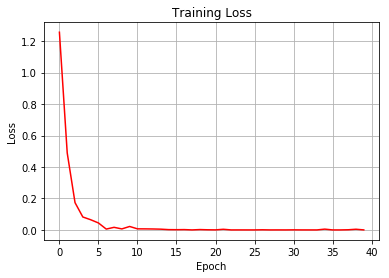

In [46]:
log_model = load_log(log_path)
keys=[int(k) for k in log_model['loss'].keys()]
sorted_keys=np.sort(keys)
values=[log_model['loss'][k] for k in sorted_keys]
epochs, losses = keys,values

plot_train_loss(epochs, losses, "Training Loss")

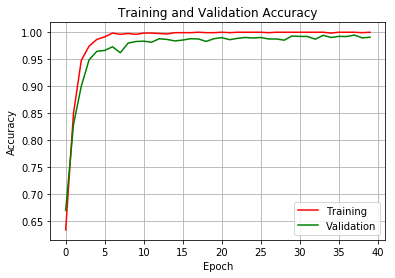

In [47]:
train_acc = [log_model['train_acc'][k] for k in sorted_keys]
valid_acc = [log_model['valid_acc'][k] for k in sorted_keys]

plot_train_valid_metric(sorted_keys, train_acc, valid_acc, 
                        'Training and Validation Accuracy')

In [48]:
with tf.Session(graph=graph) as sess:
    saver.restore(sess, model_path)

    test_accuracy = evaluate_accuracy(X_testNew, y_testNew, -1, False)
    print("Test Accuracy = {:.4f}".format(test_accuracy))

Test Accuracy = 0.9832


In [49]:
with tf.Session(graph=graph) as sess:
    saver.restore(sess, model_path)

    test_prec, test_recall = evaluate_precision_recall(X_testNew, y_testNew, -1, False)

df_test=pd.DataFrame({'Label Idx':range(0,len(test_prec['list'])),
                      'Test Precision':test_prec['list'],
                      'Test Recall':test_recall['list']},
                     index=range(1,len(test_prec['list'])+1),
                     columns=['Label Idx','Test Precision','Test Recall'])
display(HTML(df_test.to_html(index=False)))

print()
print('Weighted test precision: %.4f'%(test_prec['weighted']))
print('Weighted test recall: %.4f'%(test_recall['weighted']))
test_fscore=evaluate_fscore(beta, test_prec['weighted'], test_recall['weighted'])
print('Test Fscore: %.4f'%(test_fscore))

Label Idx,Test Precision,Test Recall
0,0.937500,1.000000
1,0.990358,0.998611
2,0.981651,0.998667
3,0.981651,0.951111
4,0.996937,0.986364
5,0.936012,0.998413
6,1.000000,0.920000
7,1.000000,0.995556
8,0.997636,0.937778
9,0.979592,1.000000



Weighted test precision: 0.9842
Weighted test recall: 0.9832
Test Fscore: 0.9837


In [50]:
df = pd.DataFrame({"Test Accuracy":test_accuracy,
                   "Test Precision (Weighted)":test_prec['weighted'],
                   "Test Recall (Weighted)":test_recall['weighted'],
                   "Test F1 Score":test_fscore},
                  index=[1],
                  columns=["Test Accuracy","Test Precision (Weighted)","Test Recall (Weighted)","Test F1 Score"],
                 )
display(HTML(df.T.to_html(header=False,index=True)))

Test Accuracy,0.983215
Test Precision (Weighted),0.984226
Test Recall (Weighted),0.983215
Test F1 Score,0.983720


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

image_path='./test-images'
files=[]
for f in listdir(image_path):
    name, ext = os.path.splitext(f)
    if (isfile(join(image_path, f)) and ext=='.jpg'):
        files.append(f)
        
files

['General caution cropped.jpg',
 'Children crossing cropped.jpg',
 'Yield cropped.jpg',
 'Slippery road cropped.jpg',
 'Speed limit 70 cropped.jpg']

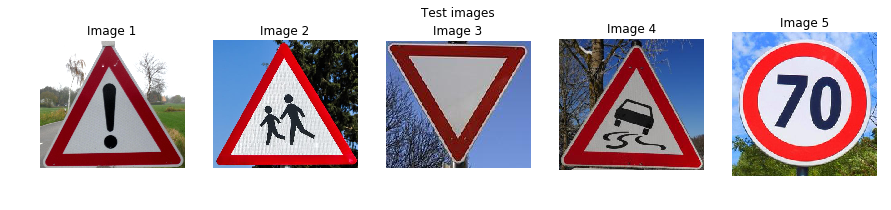

In [52]:
dispRow=1
dispCol=5
fig=NewFigure(15,3)
plt.title('Test images')
plt.axis("off")
for i in range(len(files)):
    img=mpimg.imread(join(image_path, files[i]))
    DisplaySub(dispRow,dispCol,i+1,img,'Image '+str(i+1))
plt.show()

### Predict the Sign Type for Each Image

<font color='blue'>Load the label names for all 43 labels for prediction visualization.</font>

In [53]:
signnames = pd.read_csv("signnames.csv")
display(HTML(signnames.to_html(index=False)))
idx=signnames['ClassId']
name = [n.replace('\\n','\n') for n in signnames['SignName']]
label_names = dict(zip(idx,name))

ClassId,SignName
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)
9,No passing


<font color='blue'>Load the ground truth label index for the 5 new test images.</font>

In [54]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
testWebLabels = pd.read_csv("./test-images/labelmap.csv")
display(HTML(testWebLabels.to_html(index=False)))
testWebFileName=testWebLabels['Image Name']
testWebIdx=testWebLabels['Label Index']
labelmap=dict(zip(testWebFileName,testWebIdx))

Image Name,Label Index
Children crossing cropped.jpg,28
General caution cropped.jpg,18
Slippery road cropped.jpg,23
Speed limit 70 cropped.jpg,4
Yield cropped.jpg,13


<font color='blue'>Pass the new test images through the image preprocessing pipeline.</font>

In [55]:
X_testWeb=np.zeros((len(files),32,32,3),dtype=np.uint8)
y_testWeb=np.zeros((len(files)),dtype=np.int32)
idx=0
for fname in files:
    img = mpimg.imread(join(image_path, fname))
    img_resized = imresize(img,(32,32))
    X_testWeb[idx,:,:,:]=img_resized
    y_testWeb[idx,]=labelmap[fname]
    idx+=1

In [56]:
testWebPreprocessed={}
testWebPreprocessed['labels']=y_testWeb
testWebPreprocessed['features']=X_testWeb
testWebPreprocessed['sizes']=np.zeros((y_testWeb.shape[0],2))
testWebPreprocessed['coords']=np.zeros((y_testWeb.shape[0],4))
testWebPreprocessed = maybe_preprocess(testWebPreprocessed,'test-images/testWebPreprocessed')

test-images/testWebPreprocessed.p already present - Skipping preprocessing. Loading pickle file instead.
Loading test-images/testWebPreprocessed.p ...
Loading done.


<font color='blue'>Visualize the preprocessed test images with their respective label.</font>

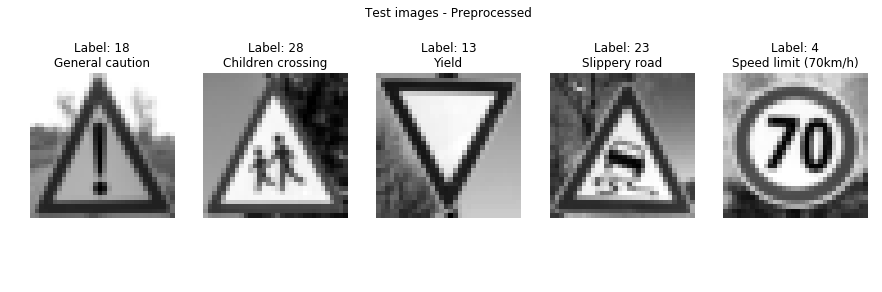

In [57]:
dispRow=1
dispCol=5
fig=NewFigure(15,4.5)
plt.title('Test images - Preprocessed')
plt.axis("off")
for i in range(len(files)):
    img=testWebPreprocessed['features'][i,:,:,0]
    DisplaySub(dispRow,dispCol,i+1,img,'Label: '+str(y_testWeb[i])+'\n'+label_names[y_testWeb[i]],'gray')
plt.show()

<font color='blue'>Perform prediction with the model.</font>

In [58]:
with tf.Session(graph=graph) as sess:
    saver.restore(sess, model_path)

    preds = predict(testWebPreprocessed['features'])
    
df=pd.DataFrame({'Ground Truth':[name[k] for k in y_testWeb[:,]],
                 'Prediction':[name[k] for k in preds.astype(np.int32)]},
                index=range(1,len(preds)+1),
                columns=['Ground Truth','Prediction'])
display(HTML(df.to_html(index=True)))

,Ground Truth,Prediction
1,General caution,General caution
2,Children crossing,Children crossing
3,Yield,Yield
4,Slippery road,Slippery road
5,Speed limit (70km/h),Speed limit (70km/h)


### Analyze Performance

In [59]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session(graph=graph) as sess:
    saver.restore(sess, model_path)

    new_accuracy = evaluate_accuracy(testWebPreprocessed['features'], testWebPreprocessed['labels'], -1, False)
    print("New Accuracy = {:.4f}".format(new_accuracy))

New Accuracy = 1.0000


In [60]:
with tf.Session(graph=graph) as sess:
    saver.restore(sess, model_path)

    new_prec,new_recall= evaluate_precision_recall(testWebPreprocessed['features'], \
                                                   testWebPreprocessed['labels'], -1, False)

In [61]:
df=pd.DataFrame({'Label':[name[k] for k in y_testWeb[:,]],
                 'Test Precision':test_prec['list'][y_testWeb[:,]],
                 'Test Recall':test_recall['list'][y_testWeb[:,]],
                 'New Precision':new_prec['list'],
                 'New Recall':new_recall['list']},
                index=range(1,len(y_testWeb[:,])+1),
                columns=['Label','Test Precision','Test Recall','New Precision','New Recall'])
dfPrecision=df.drop(['New Precision','New Recall'],axis=1)
display(HTML(dfPrecision.to_html(index=False)))

Label,Test Precision,Test Recall
General caution,0.982188,0.989744
Children crossing,1.000000,1.000000
Yield,0.995833,0.995833
Slippery road,0.993377,1.000000
Speed limit (70km/h),0.996937,0.986364


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [62]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def predict_top_k(X_data, k):
    num_examples = len(X_data)
    values = np.zeros((1,k))
    indices = np.zeros((1,k))
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_TopKV = sess.run(tf.nn.top_k(softmax_outputs,k=k), \
                         feed_dict={x: batch_x,\
                                    training_flag: False,\
                                    keep_prob_conv : 1.0,\
                                    keep_prob_fc : 1.0,\
                                    iteration : -1})
        values = np.concatenate((values,batch_TopKV.values),axis=0)
        indices = np.concatenate((indices,batch_TopKV.indices),axis=0)
        
    return values[1:,:],indices[1:,:]

In [63]:
with tf.Session(graph=graph) as sess:
    saver.restore(sess, model_path)
    values,indices=predict_top_k(testWebPreprocessed['features'],5)
print('Top 5 softmax probabilities:')
print(values)
print()
print('Top 5 indices:')
print(indices)

Top 5 softmax probabilities:
[[  1.00000000e+00   1.78157601e-32   1.17194698e-34   1.28823520e-37
    0.00000000e+00]
 [  1.00000000e+00   3.29969697e-11   7.83593059e-15   4.53849571e-16
    1.24731412e-16]
 [  1.00000000e+00   1.11534486e-33   1.20965352e-38   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   4.60092576e-13   3.18954584e-21   1.10467699e-21
    3.62531518e-22]
 [  1.00000000e+00   7.57569626e-13   2.68835375e-24   6.86643040e-28
    8.34258143e-29]]

Top 5 indices:
[[ 18.  26.  19.  11.   0.]
 [ 28.  11.  24.  27.  35.]
 [ 13.  32.  42.   0.   1.]
 [ 23.  22.  40.  31.  16.]
 [  4.   1.   0.  31.  15.]]


<font color='blue'>Visualize the top 5 predictions result.</font>

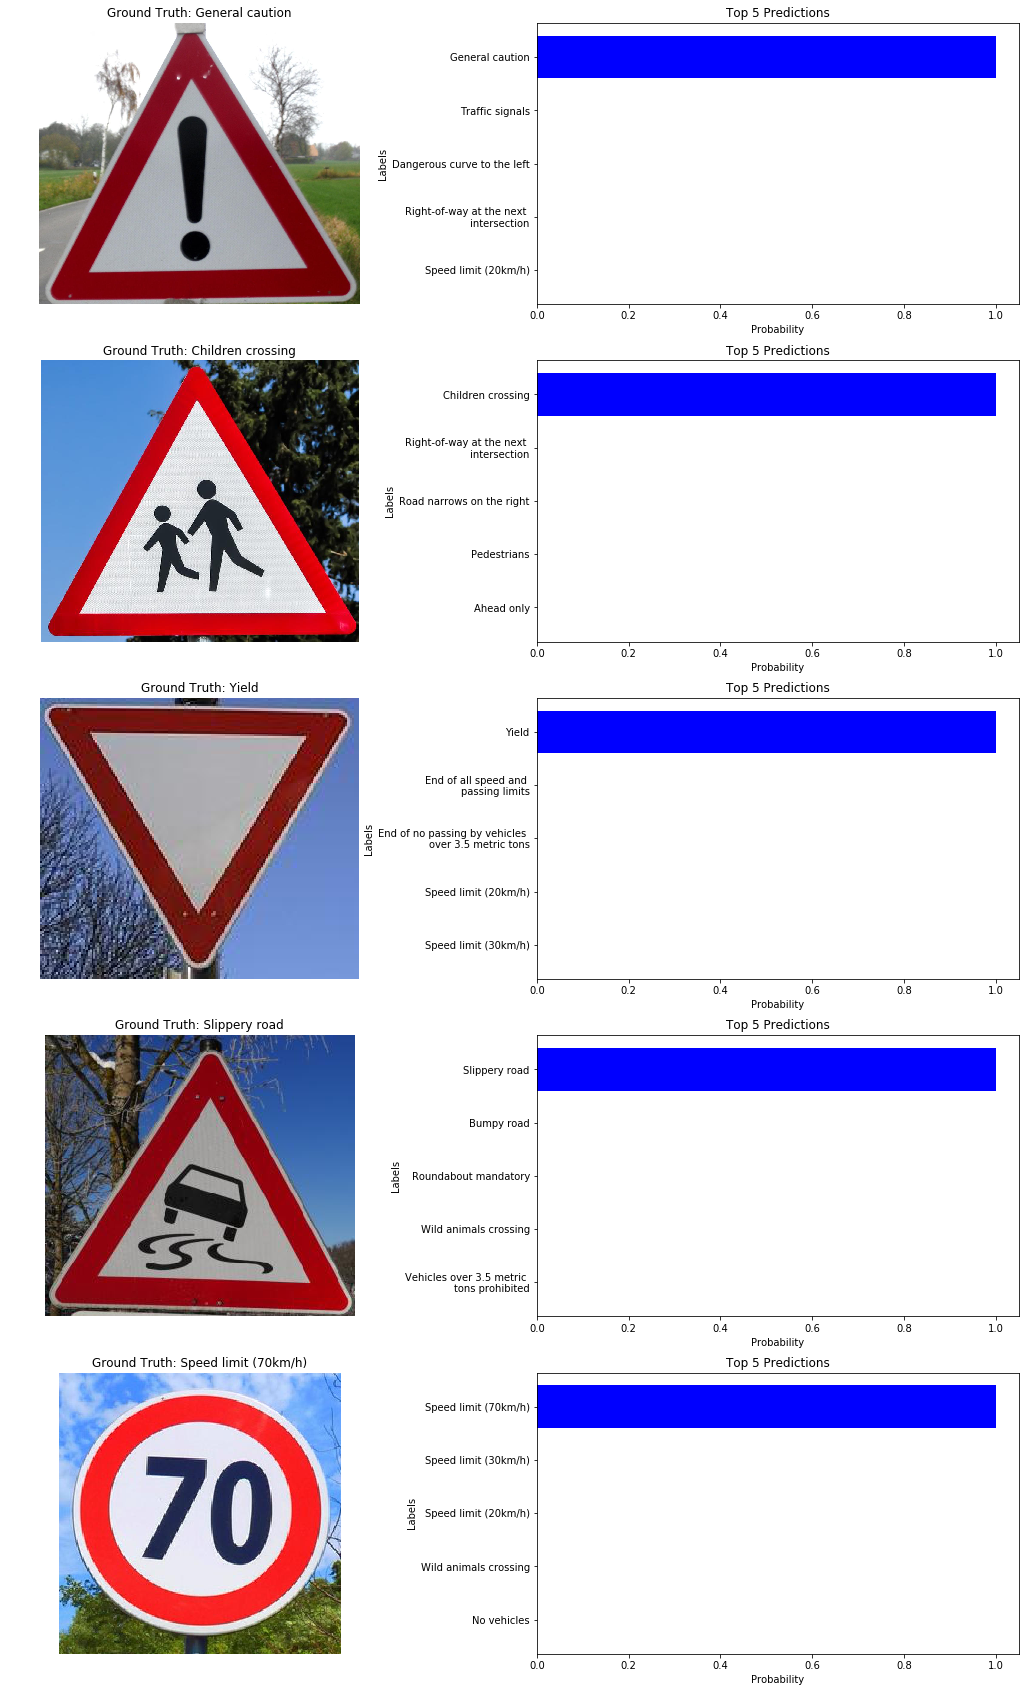

In [64]:
def plot_top_k_prob(path, files, ground_truth, data, label):
    dispRow=data.shape[0]
    fig = plt.figure(figsize=(19,6*dispRow))
    for i in range(dispRow):
        ax = fig.add_subplot(dispRow,2,2*i+1)
        img=mpimg.imread(join(image_path, files[i]))
        ax.imshow(img)
        ax.set_title('Ground Truth: '+label_names[ground_truth[files[i]]])
        ax.axis('off')
        
        ax = fig.add_subplot(dispRow,2,2*i+2)
        y_pos = np.arange(label.shape[1])
        ax.barh(y_pos, data[i,:], align='center',
                color='blue', ecolor='black')
        ax.set_xlim([0,1.05])
        ax.set_yticks(y_pos)
        ax.set_yticklabels([label_names[l] for l in indices[i,:]])
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_ylabel('Labels')
        ax.set_xlabel('Probability')
        ax.set_title('Top '+str(label.shape[1])+' Predictions')

plot_top_k_prob(image_path,files,labelmap,values,indices)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [65]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that 
# represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, 
# by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, 
# just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable 
    # from inside a function
    
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    sess = tf.get_default_session()
    activation = sess.run(tf_activation,\
                          feed_dict={x : image_input, \
                                     training_flag : False,\
                                     keep_prob_conv : 1.0,\
                                     keep_prob_fc : 1.0,\
                                     iteration : -1\
                                    })
    featuremaps = activation.shape[3]
    dispCol = 6
    dispRow = np.ceil(featuremaps/float(dispCol))
    plt.figure(plt_num, figsize=(15,dispRow*3))
    for featuremap in range(featuremaps):
        plt.subplot(dispRow,dispCol, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, \
                       vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, \
                       cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, \
                       cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

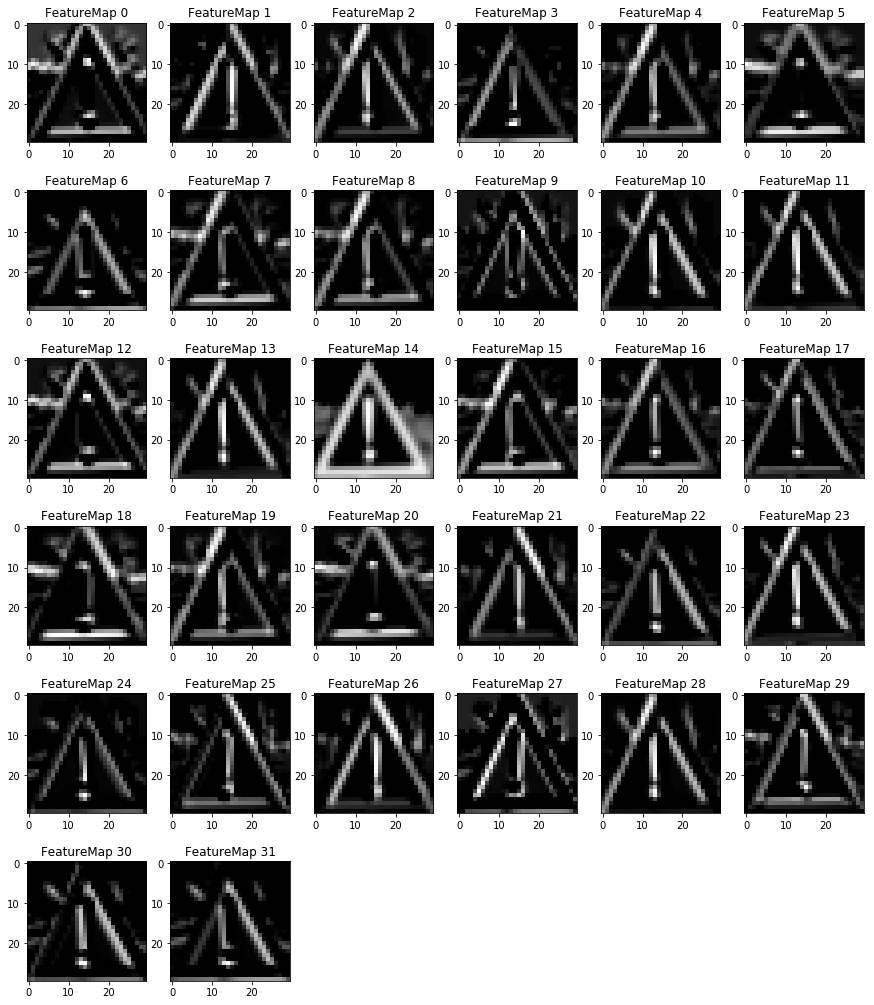

In [66]:
with tf.Session(graph=graph) as sess:
    saver.restore(sess, model_path)
    outputFeatureMap(testWebPreprocessed['features'][0,:,:,0].reshape(1,32,32,1), conv1)